#**Trabalhando com Planilhas do Excel**

In [2]:
import pandas as pd

In [5]:
df_aracaju = pd.read_excel("/content/drive/MyDrive/Datasets/Aracaju.xlsx")
df_fortaleza = pd.read_excel("/content/drive/MyDrive/Datasets/Fortaleza.xlsx")
df_natal = pd.read_excel("/content/drive/MyDrive/Datasets/Natal.xlsx")
df_recife = pd.read_excel("/content/drive/MyDrive/Datasets/Recife.xlsx")
df_salvador = pd.read_excel("/content/drive/MyDrive/Datasets/Salvador.xlsx")

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
df = pd.concat([df_aracaju,df_fortaleza,df_natal,df_recife,df_salvador])

In [9]:
df["LojaID"] = df["LojaID"].astype("object")

In [10]:
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID            object
Qtde               int64
dtype: object

In [11]:
df["Vendas"].fillna(0, inplace=True)

**Criando colunas novas**

In [12]:
#Criando a coluna de receita
df["Receita"] = df["Vendas"].mul(df["Qtde"])

In [13]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita
0,Aracaju,2018-01-01,142.00,1520,1,142.00
1,Aracaju,2018-01-01,14.21,1522,6,85.26
2,Aracaju,2018-01-01,71.55,1520,1,71.55
3,Aracaju,2018-01-01,3.01,1521,7,21.07
4,Aracaju,2018-01-01,24.51,1522,8,196.08


In [14]:
df["Receita/Vendas"] = df["Receita"] / df["Vendas"] 

In [15]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
0,Aracaju,2018-01-01,142.00,1520,1,142.00,1.0
1,Aracaju,2018-01-01,14.21,1522,6,85.26,6.0
2,Aracaju,2018-01-01,71.55,1520,1,71.55,1.0
3,Aracaju,2018-01-01,3.01,1521,7,21.07,7.0
4,Aracaju,2018-01-01,24.51,1522,8,196.08,8.0


#**Trabalhando com datas**

In [16]:
df["Data"] = df["Data"].astype("int64")

In [17]:
df["Data"] = pd.to_datetime(df["Data"])

In [18]:
df.dtypes

Cidade                    object
Data              datetime64[ns]
Vendas                   float64
LojaID                    object
Qtde                       int64
Receita                  float64
Receita/Vendas           float64
dtype: object

In [19]:
df["Ano_Venda"] = df["Data"].dt.year

In [20]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda
215,Salvador,2019-01-02,203.84,1036,1,203.84,1.0,2019
45,Aracaju,2018-01-01,131.12,1523,5,655.60,5.0,2018
85,Fortaleza,2019-01-01,149.00,1005,3,447.00,3.0,2019
212,Natal,2019-01-02,50.73,1037,3,152.19,3.0,2019
174,Salvador,2019-01-02,35.30,1037,1,35.30,1.0,2019


In [36]:
df["Mes_venda"] = (df["Data"].dt.month)

In [38]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda,mes_venda,Mes_venda
44,Aracaju,2018-01-01,11.42,1520,5,57.10,5.0,2018,1,1
86,Natal,2019-01-02,156.47,1037,3,469.41,3.0,2019,1,1
85,Fortaleza,2019-01-01,149.00,1005,3,447.00,3.0,2019,1,1
237,Salvador,2019-01-03,38.06,1036,3,114.18,3.0,2019,1,1
88,Natal,2019-01-02,31.20,1036,1,31.20,1.0,2019,1,1


In [39]:
df["trimestre_venda"] = df["Data"].dt.quarter

In [40]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda,mes_venda,Mes_venda,trimestre_venda
86,Aracaju,2018-01-01,154.92,1521,5,774.60,5.0,2018,1,1,1
124,Salvador,2019-03-02,44.82,1034,3,134.46,3.0,2019,3,3,1
136,Recife,2019-03-02,39.09,982,4,156.36,4.0,2019,3,3,1
236,Salvador,2019-01-03,126.29,1035,3,378.87,3.0,2019,1,1,1
82,Salvador,2019-01-01,207.88,1035,1,207.88,1.0,2019,1,1,1


In [41]:
vendas_marco_19 = df.loc[(df["Data"].dt.year == 2019) & (df["Data"].dt.month == 3)]

In [42]:
vendas_marco_19.sample(20)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda,mes_venda,Mes_venda,trimestre_venda
141,Recife,2019-03-02,182.75,983,8,1462.00,8.0,2019,3,3,1
136,Salvador,2019-03-02,13.81,1036,1,13.81,1.0,2019,3,3,1
138,Recife,2019-03-02,150.38,983,6,902.28,6.0,2019,3,3,1
119,Recife,2019-03-02,152.30,982,7,1066.10,7.0,2019,3,3,1
135,Salvador,2019-03-02,9.95,1037,3,29.85,3.0,2019,3,3,1
71,Natal,2019-03-20,840.00,854,3,2520.00,3.0,2019,3,3,1
122,Fortaleza,2019-03-02,235.06,983,3,705.18,3.0,2019,3,3,1
129,Salvador,2019-03-02,125.66,1037,1,125.66,1.0,2019,3,3,1
137,Salvador,2019-03-02,51.66,1036,3,154.98,3.0,2019,3,3,1
141,Fortaleza,2019-03-02,182.75,983,8,1462.00,8.0,2019,3,3,1


In [44]:
df.drop(columns="mes_venda")

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda,Mes_venda,trimestre_venda
0,Aracaju,2018-01-01,142.00,1520,1,142.00,1.0,2018,1,1
1,Aracaju,2018-01-01,14.21,1522,6,85.26,6.0,2018,1,1
2,Aracaju,2018-01-01,71.55,1520,1,71.55,1.0,2018,1,1
3,Aracaju,2018-01-01,3.01,1521,7,21.07,7.0,2018,1,1
4,Aracaju,2018-01-01,24.51,1522,8,196.08,8.0,2018,1,1
...,...,...,...,...,...,...,...,...,...,...
235,Salvador,2019-01-03,41.84,1034,1,41.84,1.0,2019,1,1
236,Salvador,2019-01-03,126.29,1035,3,378.87,3.0,2019,1,1
237,Salvador,2019-01-03,38.06,1036,3,114.18,3.0,2019,1,1
238,Salvador,2019-01-03,139.64,1035,1,139.64,1.0,2019,1,1


#**Visualização de dados**

In [45]:
df["LojaID"].value_counts(ascending=False)

1036    117
1035    112
1037    101
1034     67
983      65
982      44
1522     41
1520     39
980      36
981      31
1002     30
1005     30
852      29
1523     29
1004     28
854      28
853      26
1521     21
1003     20
Name: LojaID, dtype: int64

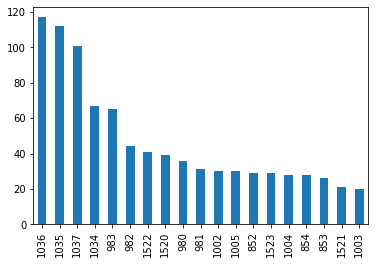

In [46]:
df["LojaID"].value_counts(ascending=False).plot.bar()

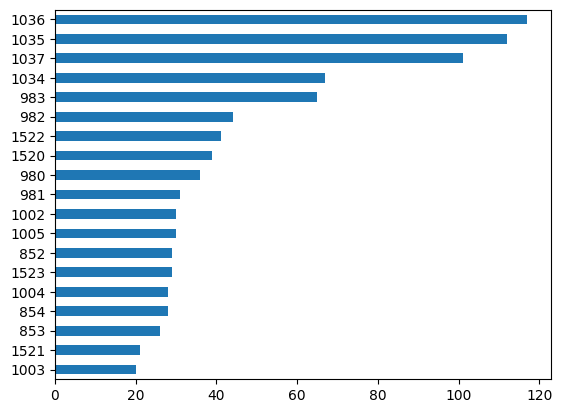

In [ ]:
df["LojaID"].value_counts(ascending=True).plot.barh();

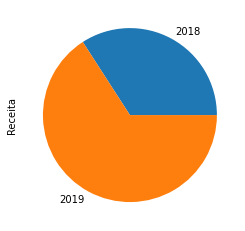

In [48]:
df.groupby(df["Data"].dt.year)["Receita"].sum().plot.pie()

In [49]:
df["Cidade"].value_counts()

Salvador     240
Natal        240
Fortaleza    142
Recife       142
Aracaju      130
Name: Cidade, dtype: int64

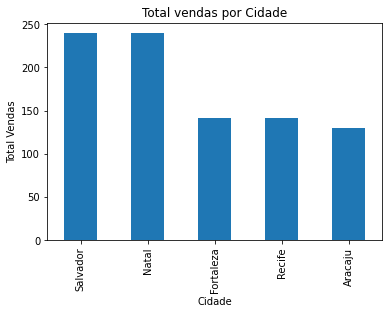

In [50]:
import matplotlib.pyplot as plt
df["Cidade"].value_counts().plot.bar(title="Total vendas por Cidade")
plt.xlabel("Cidade")
plt.ylabel("Total Vendas");

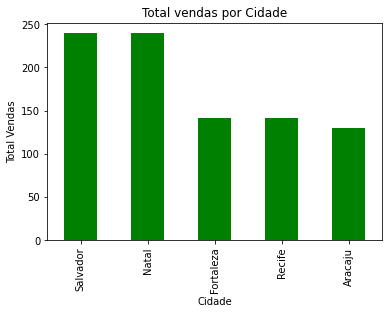

In [51]:
df["Cidade"].value_counts().plot.bar(title="Total vendas por Cidade", color="green")
plt.xlabel("Cidade")
plt.ylabel("Total Vendas");

In [52]:
plt.style.use("ggplot")

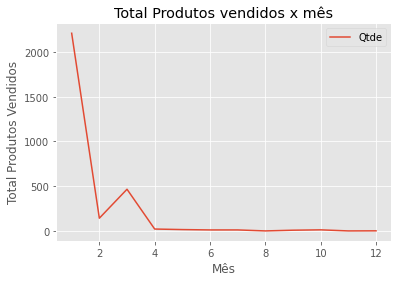

In [53]:
df.groupby(df["mes_venda"])["Qtde"].sum().plot(title = "Total Produtos vendidos x mês")
plt.xlabel("Mês")
plt.ylabel("Total Produtos Vendidos")
plt.legend();

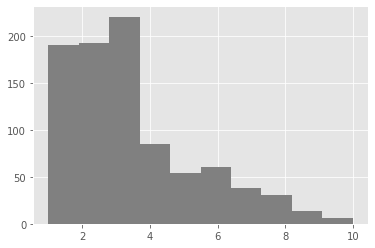

In [58]:
plt.hist(df["Qtde"], color="grey");

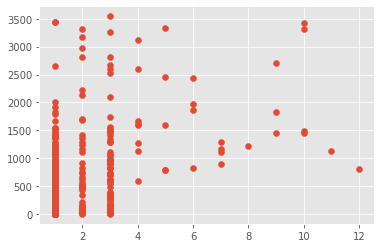

In [61]:
plt.scatter(x=df["Mes_venda"], y = df["Receita"]);